In [1]:
import pandas as pd
import numpy as np

## 문자열 연산

- 파이썬의 문자열 연산자를 거의 모두 반영

In [2]:
name_tuple = ['Suan Lee', 'Steven Jobs', 'Larry Page', 'Elon Musk', None, 'Bill Gates', 'Mark Zuckerberg',
             'Jeff Bezos']
names = pd.Series(name_tuple)
names

0           Suan Lee
1        Steven Jobs
2         Larry Page
3          Elon Musk
4               None
5         Bill Gates
6    Mark Zuckerberg
7         Jeff Bezos
dtype: object

In [3]:
# 문자열 연산 처리에 접근할때는 'str'
names.str.lower()

0           suan lee
1        steven jobs
2         larry page
3          elon musk
4               None
5         bill gates
6    mark zuckerberg
7         jeff bezos
dtype: object

In [4]:
names.str.split()

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

- 기타 연산자

In [5]:
names.str[0:4]

0    Suan
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Mark
7    Jeff
dtype: object

In [6]:
names.str.split().str.get(-1)

0           Lee
1          Jobs
2          Page
3          Musk
4          None
5         Gates
6    Zuckerberg
7         Bezos
dtype: object

In [7]:
names.str.repeat(2)

0                  Suan LeeSuan Lee
1            Steven JobsSteven Jobs
2              Larry PageLarry Page
3                Elon MuskElon Musk
4                              None
5              Bill GatesBill Gates
6    Mark ZuckerbergMark Zuckerberg
7              Jeff BezosJeff Bezos
dtype: object

In [8]:
names.str.join('*')

0                  S*u*a*n* *L*e*e
1            S*t*e*v*e*n* *J*o*b*s
2              L*a*r*r*y* *P*a*g*e
3                E*l*o*n* *M*u*s*k
4                             None
5              B*i*l*l* *G*a*t*e*s
6    M*a*r*k* *Z*u*c*k*e*r*b*e*r*g
7              J*e*f*f* *B*e*z*o*s
dtype: object

- 정규표현식

In [9]:
names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    None
5    True
6    True
7    True
dtype: object

In [10]:
# 정규표현식에 해당하는 것들 모두 출력
names.str.findall('([A-Za-z]+)')

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

- 시계열 처리

In [11]:
idx = pd.DatetimeIndex(['2019-01-01', '2020-01-01', '2020-02-01', '2020-02-02', '2020-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index = idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [12]:
s['2020-01-01':]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [13]:
s[:'2020-01-01']

2019-01-01    0
2020-01-01    1
dtype: int64

In [14]:
s['2019']

2019-01-01    0
dtype: int64

- 시계열 데이터 구조

In [15]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020, 1, 1), '2nd of Feb, 2020', '2020-Mar-4', '20200701'])
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [16]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]', freq='D')

In [17]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [18]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [19]:
pd.date_range('2020-01-01', periods = 7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [20]:
pd.date_range('2020-01-01', periods = 7, freq = 'M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [21]:
pd.date_range('2020-01-01', periods = 7, freq = 'H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [22]:
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [23]:
idx[2]
# 'NaT' = Not a Time

NaT

In [24]:
pd.isnull(idx)

array([False, False,  True])

- 시계열 기본

In [25]:
dates = [datetime(2020, 1, 1), datetime(2020, 1, 2), datetime(2020, 1, 4), datetime(2020, 1, 7),
        datetime(2020, 1, 10), datetime(2020, 1, 11), datetime(2020, 1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [26]:
# 날짜 인덱스를 가지는 series
ts = pd.Series(np.random.randn(7), index = dates)
ts

2020-01-01   -1.936937
2020-01-02    0.437341
2020-01-04   -0.298740
2020-01-07   -1.246012
2020-01-10    0.914730
2020-01-11   -1.054696
2020-01-15   -0.508022
dtype: float64

In [27]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [28]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [29]:
ts[ts.index[2]]

-0.29874022220710894

In [30]:
ts['20200104']

-0.29874022220710894

In [31]:
ts['1/4/2020']

-0.29874022220710894

In [32]:
ts['4th of Jan, 2020']

-0.29874022220710894

In [33]:
ts = pd.Series(np.random.randn(1000),
              index = pd.date_range('2017-10-01', periods = 1000))
ts

2017-10-01    1.346007
2017-10-02    1.495221
2017-10-03   -0.967530
2017-10-04   -1.346233
2017-10-05   -0.317427
                ...   
2020-06-22    0.015066
2020-06-23    1.057223
2020-06-24    1.235234
2020-06-25   -1.319947
2020-06-26   -0.132205
Freq: D, Length: 1000, dtype: float64

In [34]:
ts['2020']

2020-01-01   -1.214886
2020-01-02    0.266560
2020-01-03   -0.336918
2020-01-04   -0.533646
2020-01-05   -0.858239
                ...   
2020-06-22    0.015066
2020-06-23    1.057223
2020-06-24    1.235234
2020-06-25   -1.319947
2020-06-26   -0.132205
Freq: D, Length: 178, dtype: float64

In [35]:
ts['2020-06']

2020-06-01   -0.008560
2020-06-02    1.685588
2020-06-03    1.710936
2020-06-04   -2.065876
2020-06-05   -1.610386
2020-06-06   -0.442575
2020-06-07   -1.179980
2020-06-08    1.354669
2020-06-09    0.698342
2020-06-10    0.889197
2020-06-11   -0.227285
2020-06-12   -1.727148
2020-06-13    0.019954
2020-06-14    0.824575
2020-06-15    1.057561
2020-06-16    0.377770
2020-06-17   -0.861136
2020-06-18    1.345166
2020-06-19   -1.057608
2020-06-20    1.199014
2020-06-21   -1.377273
2020-06-22    0.015066
2020-06-23    1.057223
2020-06-24    1.235234
2020-06-25   -1.319947
2020-06-26   -0.132205
Freq: D, dtype: float64

In [36]:
ts[datetime(2020, 6, 20):]

2020-06-20    1.199014
2020-06-21   -1.377273
2020-06-22    0.015066
2020-06-23    1.057223
2020-06-24    1.235234
2020-06-25   -1.319947
2020-06-26   -0.132205
Freq: D, dtype: float64

In [37]:
ts['2020-06-10' : '2020-06-20']

2020-06-10    0.889197
2020-06-11   -0.227285
2020-06-12   -1.727148
2020-06-13    0.019954
2020-06-14    0.824575
2020-06-15    1.057561
2020-06-16    0.377770
2020-06-17   -0.861136
2020-06-18    1.345166
2020-06-19   -1.057608
2020-06-20    1.199014
Freq: D, dtype: float64

In [38]:
tdf = pd.DataFrame(np.random.randn(1000, 4),
                  index = pd.date_range('2017-10-01', periods = 1000),
                  columns = ['A', 'B', 'C', 'D'])
tdf

A         B         C         D
2017-10-01 -0.656092 -0.320023 -1.593978  0.591339
2017-10-02  0.852657 -1.638035 -0.925056  1.506132
2017-10-03  0.509487  0.314197 -0.221567  0.881363
2017-10-04  0.991406  1.146645  0.737740  0.709409
2017-10-05  0.187567  0.224399  1.087689 -0.580841
...              ...       ...       ...       ...
2020-06-22 -0.185401 -0.417138 -0.277089  0.623736
2020-06-23  0.193170  1.742717 -0.448089 -0.156753
2020-06-24 -0.007196 -1.256930  0.302842 -0.843824
2020-06-25  1.095368 -0.540529  0.448673 -0.655086
2020-06-26  1.368494 -0.406554  1.474484 -0.576933

[1000 rows x 4 columns]

In [39]:
tdf['2020']

<ipython-input-39-8f66df2f472c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tdf['2020']


A         B         C         D
2020-01-01  1.149602  1.011026  0.245206  0.359989
2020-01-02 -0.089977  0.135917 -0.244822 -0.205182
2020-01-03 -0.352444  1.053299 -0.135022  0.309268
2020-01-04  0.634208  0.143042 -1.250254  0.161223
2020-01-05  1.081356 -0.466344 -1.091425 -0.031866
...              ...       ...       ...       ...
2020-06-22 -0.185401 -0.417138 -0.277089  0.623736
2020-06-23  0.193170  1.742717 -0.448089 -0.156753
2020-06-24 -0.007196 -1.256930  0.302842 -0.843824
2020-06-25  1.095368 -0.540529  0.448673 -0.655086
2020-06-26  1.368494 -0.406554  1.474484 -0.576933

[178 rows x 4 columns]

In [40]:
tdf.loc['2020-06']

A         B         C         D
2020-06-01  1.847637 -0.288071  0.306473 -1.355131
2020-06-02  0.923400  2.336525 -0.614988  1.253364
2020-06-03  1.626202 -1.378335  0.806042  1.491840
2020-06-04 -1.306146  1.827048  1.276913 -0.192272
2020-06-05  0.557849  0.724740 -1.003222 -0.245457
2020-06-06  0.616201 -0.547942 -0.539921  1.701518
2020-06-07  0.867606  0.903984 -0.166759 -0.210023
2020-06-08 -0.185223  0.501058  1.302258 -0.733733
2020-06-09 -0.966837 -0.396709 -0.961997 -0.047718
2020-06-10 -0.855808 -0.043865 -0.657498 -1.809684
2020-06-11 -1.655418  1.044291 -0.147597 -0.850276
2020-06-12  0.849875 -0.078571 -0.522490 -0.814435
2020-06-13  0.035453 -0.815174  0.046489  1.345625
2020-06-14  0.477427  2.157137 -1.018360  0.164782
2020-06-15  0.008628  0.058794  0.388478 -0.795315
2020-06-16 -0.267893  1.248820 -1.451507 -0.624207
2020-06-17 -1.935288  0.991736  0.188207 -1.121164
2020-06-18 -0.226114 -0.345053  1.171697  0.066927
2020-06-19  0.252643 -0.072782  0.318329  0.281324
2020-06-20  1.790402 -0.395664  0.654937  0.219142
2020-06-21  0.558322  2.228135 -0.535814  1.766475
2020-06-22 -0.185401 -0.417138 -0.277089  0.623736
2020-06-23  0.193170  1.742717 -0.448089 -0.156753
2020-06-24 -0.007196 -1.256930  0.302842 -0.843824
2020-06-25  1.095368 -0.540529  0.448673 -0.655086
2020-06-26  1.368494 -0.406554  1.474484 -0.576933

In [41]:
tdf['2020-06-20':'2020-06-20']

A         B         C         D
2020-06-20  1.790402 -0.395664  0.654937  0.219142

In [42]:
tdf['C']

2017-10-01   -1.593978
2017-10-02   -0.925056
2017-10-03   -0.221567
2017-10-04    0.737740
2017-10-05    1.087689
                ...   
2020-06-22   -0.277089
2020-06-23   -0.448089
2020-06-24    0.302842
2020-06-25    0.448673
2020-06-26    1.474484
Freq: D, Name: C, Length: 1000, dtype: float64

In [43]:
# 중복을 포함한 데이터프레임 생성
ts = pd.Series(np.random.randn(10),
              index = pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02', '2020-01-03', '2020-01-04',
                                       '2020-01-05', '2020-01-05', '2020-01-06', '2020-01-07']))
ts

2020-01-01   -0.936187
2020-01-01    0.129256
2020-01-02    0.965911
2020-01-02   -0.664073
2020-01-03    0.246034
2020-01-04   -0.108543
2020-01-05    0.832654
2020-01-05    0.088405
2020-01-06   -1.075324
2020-01-07   -0.181945
dtype: float64

In [44]:
ts.index.is_unique

False

In [45]:
ts['2020-01-01']

2020-01-01   -0.936187
2020-01-01    0.129256
dtype: float64

In [46]:
ts.groupby(level = 0).mean()

2020-01-01   -0.403465
2020-01-02    0.150919
2020-01-03    0.246034
2020-01-04   -0.108543
2020-01-05    0.460529
2020-01-06   -1.075324
2020-01-07   -0.181945
dtype: float64

In [47]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [48]:
pd.date_range(start = '2020-01-01', periods = 10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [49]:
pd.date_range(end = '2020-07-01', periods = 10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [50]:
# freq = 'B', Business (영업일)만 산출
pd.date_range('2020-07-01', '2020-07-07', freq = 'B')

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

- 주기와 오프셋

    - 주기

In [51]:
pd.timedelta_range(0, periods = 12, freq = 'H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [52]:
pd.timedelta_range(0, periods = 60, freq = 'T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [53]:
pd.timedelta_range(0, periods = 10, freq = '1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [54]:
pd.date_range('2020-01-01', periods = 20, freq = 'B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [55]:
pd.date_range('2020-01-01', periods = 30, freq = '2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [56]:
pd.date_range('2020-01-01', periods = 30, freq = 'S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19',
               '2020-01-01 00:00:20', '2020-01-01 00:00:21',
               '2020-01-01 00:00:22', '2020-01-01 00:00:23',
               '2020-01-01 00:00:24', '2020-01-01 00:00:25',
               '2020-01-01 00:00:26', '2020-01-01 00:00:27',
               '2020-01-01 00:00:28', '2020-01-01 00:00:29'],
              dtype='datetime64[ns]', freq='S')

- 시프트(Shift)

In [57]:
ts = pd.Series(np.random.randn(5),
              index = pd.date_range('2020-01-01', periods = 5, freq = 'B'))
ts

2020-01-01   -0.482474
2020-01-02    0.480978
2020-01-03   -0.733059
2020-01-06   -2.001150
2020-01-07   -0.588507
Freq: B, dtype: float64

In [58]:
ts.shift(1)

2020-01-01         NaN
2020-01-02   -0.482474
2020-01-03    0.480978
2020-01-06   -0.733059
2020-01-07   -2.001150
Freq: B, dtype: float64

In [59]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06   -0.482474
2020-01-07    0.480978
Freq: B, dtype: float64

In [60]:
ts.shift(-1)

2020-01-01    0.480978
2020-01-02   -0.733059
2020-01-03   -2.001150
2020-01-06   -0.588507
2020-01-07         NaN
Freq: B, dtype: float64

In [61]:
ts.shift(3, freq = 'B')

2020-01-06   -0.482474
2020-01-07    0.480978
2020-01-08   -0.733059
2020-01-09   -2.001150
2020-01-10   -0.588507
Freq: B, dtype: float64

In [62]:
ts.shift(2, freq = 'W')

2020-01-12   -0.482474
2020-01-12    0.480978
2020-01-12   -0.733059
2020-01-19   -2.001150
2020-01-19   -0.588507
dtype: float64

- 시간대 처리
    * 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대처리
    * 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 pytz 사용

In [63]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [64]:
tz = pytz.timezone('Asia/Seoul')

In [65]:
dinx = pd.date_range('2020-01-01 09:00', periods = 7, freq = 'B')
ts = pd.Series(np.random.randn(len(dinx)),
                              index = dinx)
ts

2020-01-01 09:00:00   -1.038676
2020-01-02 09:00:00    1.249381
2020-01-03 09:00:00    0.894382
2020-01-06 09:00:00   -1.768124
2020-01-07 09:00:00   -1.761053
2020-01-08 09:00:00    0.078928
2020-01-09 09:00:00    1.492419
Freq: B, dtype: float64

In [66]:
pd.date_range('2020-01-01 09:00', periods = 7, freq = 'B', tz = 'UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [67]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00   -1.038676
2020-01-02 09:00:00+00:00    1.249381
2020-01-03 09:00:00+00:00    0.894382
2020-01-06 09:00:00+00:00   -1.768124
2020-01-07 09:00:00+00:00   -1.761053
2020-01-08 09:00:00+00:00    0.078928
2020-01-09 09:00:00+00:00    1.492419
Freq: B, dtype: float64

In [68]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [69]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00   -1.038676
2020-01-02 18:00:00+09:00    1.249381
2020-01-03 18:00:00+09:00    0.894382
2020-01-06 18:00:00+09:00   -1.768124
2020-01-07 18:00:00+09:00   -1.761053
2020-01-08 18:00:00+09:00    0.078928
2020-01-09 18:00:00+09:00    1.492419
Freq: B, dtype: float64

In [70]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00   -1.038676
2020-01-02 09:00:00+09:00    1.249381
2020-01-03 09:00:00+09:00    0.894382
2020-01-06 09:00:00+09:00   -1.768124
2020-01-07 09:00:00+09:00   -1.761053
2020-01-08 09:00:00+09:00    0.078928
2020-01-09 09:00:00+09:00    1.492419
dtype: float64

In [71]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00   -1.038676
2020-01-02 00:00:00+00:00    1.249381
2020-01-03 00:00:00+00:00    0.894382
2020-01-06 00:00:00+00:00   -1.768124
2020-01-07 00:00:00+00:00   -1.761053
2020-01-08 00:00:00+00:00    0.078928
2020-01-09 00:00:00+00:00    1.492419
dtype: float64

In [72]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00   -1.038676
2020-01-02 01:00:00+01:00    1.249381
2020-01-03 01:00:00+01:00    0.894382
2020-01-06 01:00:00+01:00   -1.768124
2020-01-07 01:00:00+01:00   -1.761053
2020-01-08 01:00:00+01:00    0.078928
2020-01-09 01:00:00+01:00    1.492419
dtype: float64

In [73]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [74]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [75]:
stamp_utc.value

1577880000000000000

In [76]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [77]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [78]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz = 'America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [79]:
stamp_ny.value

1577898000000000000

In [80]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [81]:
stamp = pd.Timestamp('2020-01-01 12:00', tz = 'Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [82]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [83]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [84]:
ts_utc

2020-01-01 09:00:00+00:00   -1.038676
2020-01-02 09:00:00+00:00    1.249381
2020-01-03 09:00:00+00:00    0.894382
2020-01-06 09:00:00+00:00   -1.768124
2020-01-07 09:00:00+00:00   -1.761053
2020-01-08 09:00:00+00:00    0.078928
2020-01-09 09:00:00+00:00    1.492419
Freq: B, dtype: float64

In [85]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')
ts = ts1 + ts2
ts

2020-01-01 09:00:00+00:00         NaN
2020-01-02 09:00:00+00:00         NaN
2020-01-03 09:00:00+00:00    1.788765
2020-01-06 09:00:00+00:00   -3.536249
2020-01-07 09:00:00+00:00   -3.522105
2020-01-08 09:00:00+00:00         NaN
2020-01-09 09:00:00+00:00         NaN
Freq: B, dtype: float64

In [86]:
ts.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

- 기간과 기간연산

In [87]:
p = pd.Period(2020, freq = 'A-JAN')
p

Period('2020', 'A-JAN')

In [88]:
p + 2

Period('2022', 'A-JAN')

In [89]:
p - 3

Period('2017', 'A-JAN')

In [90]:
p1 = pd.Period(2010, freq = 'A-JAN')
p2 = pd.Period(2020, freq = 'A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [91]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq = 'M')
pr

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06'], dtype='period[M]', freq='M')

In [92]:
pd.Series(np.random.randn(6), index = pr)

2020-01   -0.402254
2020-02   -0.750640
2020-03   -0.798989
2020-04    0.201062
2020-05   -0.602570
2020-06    0.115266
Freq: M, dtype: float64

In [93]:
pidx = pd.PeriodIndex(['2020-1', '2020-2', '2020-4'], freq = 'M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]', freq='M')

In [94]:
p = pd.Period('2020', freq = 'A-FEB')
p

Period('2020', 'A-FEB')

In [95]:
p.asfreq('M', how = 'start')

Period('2019-03', 'M')

In [96]:
p.asfreq('M', how = 'end')

Period('2020-02', 'M')

In [97]:
p = pd.Period('2020', freq = 'A-OCT')
p

Period('2020', 'A-OCT')

In [98]:
p.asfreq('M', how = 'start')

Period('2019-11', 'M')

In [99]:
p.asfreq('M', how = 'end')

Period('2020-10', 'M')

In [100]:
pr = pd.period_range('2010', '2020', freq = 'A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index = pr)
ts

2010   -0.547386
2011    1.459352
2012    0.200336
2013    1.635899
2014    0.246362
2015   -0.427923
2016    0.791758
2017   -0.682977
2018   -1.729364
2019   -1.317677
2020   -0.603370
Freq: A-JAN, dtype: float64

In [101]:
ts.asfreq('M', how = 'start')

2009-02   -0.547386
2010-02    1.459352
2011-02    0.200336
2012-02    1.635899
2013-02    0.246362
2014-02   -0.427923
2015-02    0.791758
2016-02   -0.682977
2017-02   -1.729364
2018-02   -1.317677
2019-02   -0.603370
Freq: M, dtype: float64

In [102]:
# 영업일 마지막 일 출력
ts.asfreq('B', how = 'end')

2010-01-29   -0.547386
2011-01-31    1.459352
2012-01-31    0.200336
2013-01-31    1.635899
2014-01-31    0.246362
2015-01-30   -0.427923
2016-01-29    0.791758
2017-01-31   -0.682977
2018-01-31   -1.729364
2019-01-31   -1.317677
2020-01-31   -0.603370
Freq: B, dtype: float64

In [103]:
p = pd.Period('2020Q2', freq = 'Q-JAN')
p

Period('2020Q2', 'Q-JAN')

In [104]:
p.asfreq('D', 'start')

Period('2019-05-01', 'D')

In [105]:
p.asfreq('D', 'end')

Period('2019-07-31', 'D')

In [106]:
pr = pd.period_range('2019Q3', '2020Q3', freq = 'Q-JAN')
ts = pd.Series(np.arange(len(pr)), index = pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int32

In [107]:
pr = pd.date_range('2020-01-01', periods = 5, freq = 'Q-JAN')
ts = pd.Series(np.random.randn(5), index = pr)
ts

2020-01-31   -0.477979
2020-04-30    1.447486
2020-07-31    1.760512
2020-10-31    2.395136
2021-01-31    0.894841
Freq: Q-JAN, dtype: float64

In [108]:
ts.to_period()

2020Q4   -0.477979
2021Q1    1.447486
2021Q2    1.760512
2021Q3    2.395136
2021Q4    0.894841
Freq: Q-JAN, dtype: float64

In [109]:
pr = pd.date_range('2020-01-01', periods = 5, freq = 'D')
ts = pd.Series(np.random.randn(5), index = pr)
ts

2020-01-01   -0.467396
2020-01-02    1.036118
2020-01-03   -0.865834
2020-01-04   -0.371187
2020-01-05   -0.969959
Freq: D, dtype: float64

In [110]:
p = ts.to_period('M')
p

2020-01   -0.467396
2020-01    1.036118
2020-01   -0.865834
2020-01   -0.371187
2020-01   -0.969959
Freq: M, dtype: float64

In [111]:
p.to_timestamp(how = 'start')

2020-01-01   -0.467396
2020-01-01    1.036118
2020-01-01   -0.865834
2020-01-01   -0.371187
2020-01-01   -0.969959
dtype: float64

- 리샘플링(Resampling)
    - 리샘플링(Resmapling) : 시계열의 빈도 변환<br>
    - 다운샘플링(Down Sampling) : 상위 빈도 데이터를 하위 빈도 데이터로 집계<br>
    - 업샘플링(Up Sampling) : 하위 빈도 데이터를 상위 빈도 데이터로 집계<br>
    - resample 메소드

In [112]:
dr = pd.date_range('2020-01-01', periods = 200, freq = 'D')
ts = pd.Series(np.random.randn(len(dr)), index = dr)
ts

2020-01-01    0.692960
2020-01-02    0.126325
2020-01-03    0.288446
2020-01-04   -0.053606
2020-01-05    0.464327
                ...   
2020-07-14    1.263404
2020-07-15   -0.928560
2020-07-16    0.436834
2020-07-17   -1.815970
2020-07-18    0.167626
Freq: D, Length: 200, dtype: float64

In [113]:
ts.resample('M').mean()

2020-01-31    0.406497
2020-02-29    0.060896
2020-03-31    0.015915
2020-04-30   -0.245565
2020-05-31    0.226855
2020-06-30    0.164326
2020-07-31   -0.023895
Freq: M, dtype: float64

In [114]:
ts.resample('M', kind = 'period').mean()

2020-01    0.406497
2020-02    0.060896
2020-03    0.015915
2020-04   -0.245565
2020-05    0.226855
2020-06    0.164326
2020-07   -0.023895
Freq: M, dtype: float64

In [115]:
dr = pd.date_range('2020-01-01', periods = 10, freq = 'T')
ts = pd.Series(np.arange(10), index = dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int32

In [116]:
ts.resample('2T', closed = 'left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int32

In [117]:
ts.resample('2T', closed = 'right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int32

In [118]:
ts.resample('2T', closed = 'right', label = 'right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int32

In [119]:
ts.resample('2T', closed = 'right', label = 'right', loffset = '-1s').sum()

<ipython-input-119-53f605e04ee6>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('2T', closed = 'right', label = 'right', loffset = '-1s').sum()


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int32

In [120]:
ts.resample('2T').ohlc()

open  high  low  close
2020-01-01 00:00:00     0     1    0      1
2020-01-01 00:02:00     2     3    2      3
2020-01-01 00:04:00     4     5    4      5
2020-01-01 00:06:00     6     7    6      7
2020-01-01 00:08:00     8     9    8      9

In [121]:
df = pd.DataFrame(np.random.randn(10, 4),
                 index = pd.date_range('2019-10-01', periods = 10, freq = 'M'),
                 columns = (['C1', 'C2', 'C3', 'C4']))
df

C1        C2        C3        C4
2019-10-31  0.639213  0.606458 -2.012149  0.231364
2019-11-30  0.009705  0.034309 -1.578776  1.624169
2019-12-31  1.798210 -1.079322  1.805410 -1.256885
2020-01-31 -0.721827 -2.018737  0.802947 -0.046921
2020-02-29  1.152917 -0.083850 -0.990760 -0.140326
2020-03-31  0.323841 -1.120178 -0.280583  0.316364
2020-04-30 -1.719008 -1.619290 -1.010556  0.618271
2020-05-31 -0.398679 -0.494133 -0.699512 -0.581152
2020-06-30 -0.745064  0.362773  0.307963  0.260723
2020-07-31  0.817039 -0.591079 -0.343943  0.293945

In [122]:
df.resample('Y').asfreq()

C1        C2       C3        C4
2019-12-31  1.79821 -1.079322  1.80541 -1.256885
2020-12-31      NaN       NaN      NaN       NaN

In [123]:
df.resample('W-FRI').asfreq()

C1        C2        C3        C4
2019-11-01       NaN       NaN       NaN       NaN
2019-11-08       NaN       NaN       NaN       NaN
2019-11-15       NaN       NaN       NaN       NaN
2019-11-22       NaN       NaN       NaN       NaN
2019-11-29       NaN       NaN       NaN       NaN
2019-12-06       NaN       NaN       NaN       NaN
2019-12-13       NaN       NaN       NaN       NaN
2019-12-20       NaN       NaN       NaN       NaN
2019-12-27       NaN       NaN       NaN       NaN
2020-01-03       NaN       NaN       NaN       NaN
2020-01-10       NaN       NaN       NaN       NaN
2020-01-17       NaN       NaN       NaN       NaN
2020-01-24       NaN       NaN       NaN       NaN
2020-01-31 -0.721827 -2.018737  0.802947 -0.046921
2020-02-07       NaN       NaN       NaN       NaN
2020-02-14       NaN       NaN       NaN       NaN
2020-02-21       NaN       NaN       NaN       NaN
2020-02-28       NaN       NaN       NaN       NaN
2020-03-06       NaN       NaN       NaN       NaN
2020-03-13       NaN       NaN       NaN       NaN
2020-03-20       NaN       NaN       NaN       NaN
2020-03-27       NaN       NaN       NaN       NaN
2020-04-03       NaN       NaN       NaN       NaN
2020-04-10       NaN       NaN       NaN       NaN
2020-04-17       NaN       NaN       NaN       NaN
2020-04-24       NaN       NaN       NaN       NaN
2020-05-01       NaN       NaN       NaN       NaN
2020-05-08       NaN       NaN       NaN       NaN
2020-05-15       NaN       NaN       NaN       NaN
2020-05-22       NaN       NaN       NaN       NaN
2020-05-29       NaN       NaN       NaN       NaN
2020-06-05       NaN       NaN       NaN       NaN
2020-06-12       NaN       NaN       NaN       NaN
2020-06-19       NaN       NaN       NaN       NaN
2020-06-26       NaN       NaN       NaN       NaN
2020-07-03       NaN       NaN       NaN       NaN
2020-07-10       NaN       NaN       NaN       NaN
2020-07-17       NaN       NaN       NaN       NaN
2020-07-24       NaN       NaN       NaN       NaN
2020-07-31  0.817039 -0.591079 -0.343943  0.293945

In [124]:
df.resample('H').asfreq()

C1        C2        C3        C4
2019-10-31 00:00:00  0.639213  0.606458 -2.012149  0.231364
2019-10-31 01:00:00       NaN       NaN       NaN       NaN
2019-10-31 02:00:00       NaN       NaN       NaN       NaN
2019-10-31 03:00:00       NaN       NaN       NaN       NaN
2019-10-31 04:00:00       NaN       NaN       NaN       NaN
...                       ...       ...       ...       ...
2020-07-30 20:00:00       NaN       NaN       NaN       NaN
2020-07-30 21:00:00       NaN       NaN       NaN       NaN
2020-07-30 22:00:00       NaN       NaN       NaN       NaN
2020-07-30 23:00:00       NaN       NaN       NaN       NaN
2020-07-31 00:00:00  0.817039 -0.591079 -0.343943  0.293945

[6577 rows x 4 columns]

In [125]:
df.resample('H').ffill()

C1        C2        C3        C4
2019-10-31 00:00:00  0.639213  0.606458 -2.012149  0.231364
2019-10-31 01:00:00  0.639213  0.606458 -2.012149  0.231364
2019-10-31 02:00:00  0.639213  0.606458 -2.012149  0.231364
2019-10-31 03:00:00  0.639213  0.606458 -2.012149  0.231364
2019-10-31 04:00:00  0.639213  0.606458 -2.012149  0.231364
...                       ...       ...       ...       ...
2020-07-30 20:00:00 -0.745064  0.362773  0.307963  0.260723
2020-07-30 21:00:00 -0.745064  0.362773  0.307963  0.260723
2020-07-30 22:00:00 -0.745064  0.362773  0.307963  0.260723
2020-07-30 23:00:00 -0.745064  0.362773  0.307963  0.260723
2020-07-31 00:00:00  0.817039 -0.591079 -0.343943  0.293945

[6577 rows x 4 columns]

In [126]:
df.resample('H').ffill(limit = 2)

C1        C2        C3        C4
2019-10-31 00:00:00  0.639213  0.606458 -2.012149  0.231364
2019-10-31 01:00:00  0.639213  0.606458 -2.012149  0.231364
2019-10-31 02:00:00  0.639213  0.606458 -2.012149  0.231364
2019-10-31 03:00:00       NaN       NaN       NaN       NaN
2019-10-31 04:00:00       NaN       NaN       NaN       NaN
...                       ...       ...       ...       ...
2020-07-30 20:00:00       NaN       NaN       NaN       NaN
2020-07-30 21:00:00       NaN       NaN       NaN       NaN
2020-07-30 22:00:00       NaN       NaN       NaN       NaN
2020-07-30 23:00:00       NaN       NaN       NaN       NaN
2020-07-31 00:00:00  0.817039 -0.591079 -0.343943  0.293945

[6577 rows x 4 columns]

In [127]:
df.resample('Q-DEC').mean()

C1        C2        C3        C4
2019-12-31  0.815709 -0.146185 -0.595171  0.199549
2020-03-31  0.251644 -1.074255 -0.156132  0.043039
2020-06-30 -0.954251 -0.583550 -0.467368  0.099281
2020-09-30  0.817039 -0.591079 -0.343943  0.293945

In [128]:
df.resample('Y').mean()

C1        C2        C3        C4
2019-12-31  0.815709 -0.146185 -0.595171  0.199549
2020-12-31 -0.184397 -0.794928 -0.316349  0.102986

- 무빙 윈도우(Moving Window)

In [129]:
df = pd.DataFrame(np.random.randn(300, 4),
                 index = pd.date_range('2020-01-01', periods = 300, freq = 'D'),
                  columns = ['C1', 'C2', 'C3', 'C4'])
df

C1        C2        C3        C4
2020-01-01  0.761980  0.551472 -0.388933  1.267491
2020-01-02  0.144934 -0.176113  0.556707  0.412913
2020-01-03  0.001806  0.677792 -0.877185 -0.220920
2020-01-04 -0.434503  0.436829  0.792558 -1.304920
2020-01-05  0.930152 -0.218985 -0.966684 -0.847533
...              ...       ...       ...       ...
2020-10-22 -0.591551  0.655627  1.339115  0.880124
2020-10-23  0.081555  0.385918  1.538696 -1.291924
2020-10-24  0.783671  1.237707  0.275635 -0.960443
2020-10-25  0.177856 -0.656673  0.140938  0.446614
2020-10-26  0.533097 -2.258220  1.355022 -0.065781

[300 rows x 4 columns]

In [130]:
df.rolling(30).mean()

C1        C2        C3        C4
2020-01-01       NaN       NaN       NaN       NaN
2020-01-02       NaN       NaN       NaN       NaN
2020-01-03       NaN       NaN       NaN       NaN
2020-01-04       NaN       NaN       NaN       NaN
2020-01-05       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2020-10-22  0.265995 -0.098605  0.272871 -0.176770
2020-10-23  0.253002 -0.099884  0.307912 -0.215063
2020-10-24  0.250690 -0.046119  0.288172 -0.223102
2020-10-25  0.258909 -0.073652  0.230365 -0.228344
2020-10-26  0.341985 -0.161715  0.243667 -0.212747

[300 rows x 4 columns]

<AxesSubplot:>

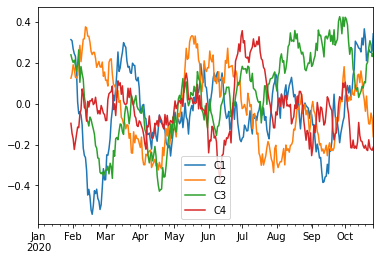

In [131]:
df.rolling(30).mean().plot()

<AxesSubplot:>

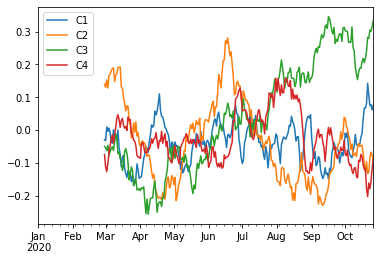

In [132]:
df.rolling(60).mean().plot()

<AxesSubplot:>

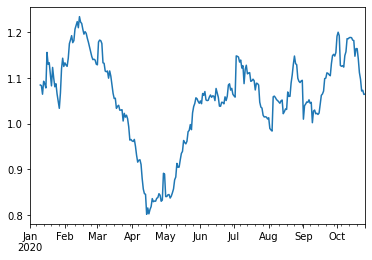

In [133]:
df.C1.rolling(60, min_periods = 10).std().plot()

<AxesSubplot:>

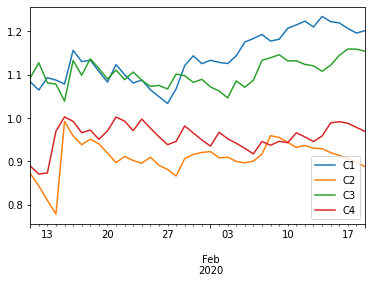

In [134]:
df.rolling(60, min_periods = 10).std()[10:50].plot()

<AxesSubplot:>

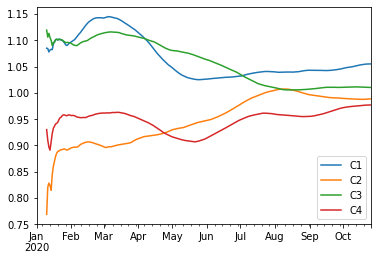

In [135]:
# 확장 윈도우 사용

df.rolling(60, min_periods = 10).std().expanding().mean().plot()

<AxesSubplot:>

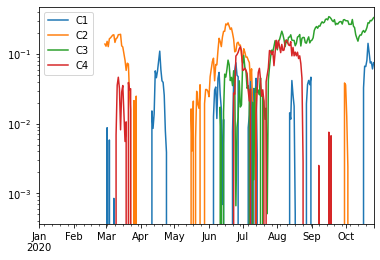

In [136]:
# 로그 스케일로 변경
df.rolling(60).mean().plot(logy = True)

<AxesSubplot:>

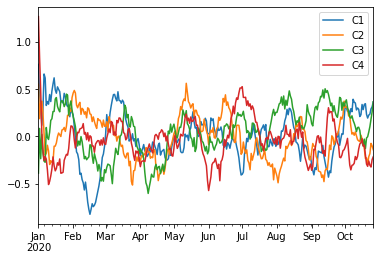

In [137]:
df.rolling('20D').mean().plot()

<AxesSubplot:>

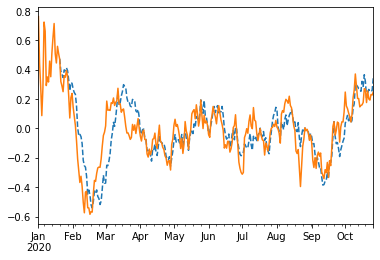

In [138]:
df.C1.rolling(30, min_periods = 20).mean().plot(style = '--', label = 'Simple MA')
df.C1.ewm(span = 30).mean().plot(style = '-', label = 'EWMA')  # rolling, expanding 같이 사용

<AxesSubplot:>

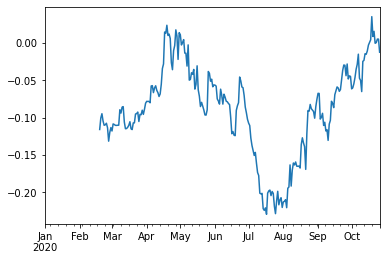

In [139]:
df.C1.rolling(100, min_periods = 50).corr(df.C3).plot()

<AxesSubplot:>

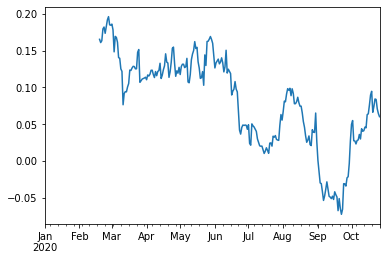

In [140]:
df.C2.rolling(100, min_periods = 50).corr(df.C4).plot()

## 데이터 읽기 및 저장

- 텍스트 파일 읽기/쓰기

In [141]:
%%writefile example1.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Overwriting example1.csv


In [142]:
!ls

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [143]:
pd.read_csv('example1.csv')

a   b   c   d   e     text
0   1   2   3   4   5       hi
1   6   7   8   9  10   pandas
2  11  12  13  14  15      csv

In [144]:
%%writefile example2.csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Overwriting example2.csv


In [145]:
pd.read_csv('example2.csv', header = None)

0   1   2   3   4        5
0   1   2   3   4   5       hi
1   6   7   8   9  10   pandas
2  11  12  13  14  15      csv

In [146]:
pd.read_csv('example2.csv', names = ['a', 'b', 'c', 'd', 'e', 'text'])

a   b   c   d   e     text
0   1   2   3   4   5       hi
1   6   7   8   9  10   pandas
2  11  12  13  14  15      csv

In [147]:
pd.read_csv('example2.csv', names = ['a', 'b', 'c', 'd', 'e', 'text'], index_col = 'text')

a   b   c   d   e
text                       
 hi       1   2   3   4   5
 pandas   6   7   8   9  10
 csv     11  12  13  14  15

In [148]:
%%writefile example3.txt
     a     b     c
1  0.1   0.2   0.3
2  0.4   0.5   0.6
3  0.7   0.8   0.9


Overwriting example3.txt


In [149]:
pd.read_table('example3.txt', sep = '\s+')

a    b    c
1  0.1  0.2  0.3
2  0.4  0.5  0.6
3  0.7  0.8  0.9

In [150]:
%%writefile example4.csv
# 파일 설명 
a, b, c, d, e, text
# 컬럼은 a, b, c, d, e와 text가 있음
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Overwriting example4.csv


In [151]:
pd.read_csv('example4.csv', skiprows = [0, 2])

a   b   c   d   e     text
0   1   2   3   4   5       hi
1   6   7   8   9  10   pandas
2  11  12  13  14  15      csv

In [152]:
%%writefile example5.csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv

Overwriting example5.csv


In [153]:
pd.read_csv('example5.csv')

a    b    c      d   e     text
0   1    2   NA      4   5       hi
1   6    7    8   NULL  10   pandas
2  11   NA   13     14  15      csv

In [154]:
%%writefile example6.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Overwriting example6.csv


In [155]:
pd.read_csv('example6.csv', nrows = 5)

a   b   c   d   e     text
0   1   2   3   4   5       hi
1   6   7   8   9  10   pandas
2  11  12  13  14  15      csv
3   1   2   3   4   5       hi
4   6   7   8   9  10   pandas

In [156]:
df = pd.read_csv('example6.csv')
df

a   b   c   d   e     text
0    1   2   3   4   5       hi
1    6   7   8   9  10   pandas
2   11  12  13  14  15      csv
3    1   2   3   4   5       hi
4    6   7   8   9  10   pandas
5   11  12  13  14  15      csv
6    1   2   3   4   5       hi
7    6   7   8   9  10   pandas
8   11  12  13  14  15      csv
9    1   2   3   4   5       hi
10   6   7   8   9  10   pandas
11  11  12  13  14  15      csv
12   1   2   3   4   5       hi
13   6   7   8   9  10   pandas
14  11  12  13  14  15      csv

In [157]:
df.to_csv('output.csv')

In [158]:
!cat output.csv

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [159]:
dr = pd.date_range('2020-01-01', periods = 10)
ts = pd.Series(np.arange(10), index = dr)
ts

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int32

In [160]:
ts.to_csv('ts.csv', header = ['value'])

In [161]:
!cat ts.csv

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [162]:
%%writefile example.json
[{"a":1, "b":2, "c":3, "d":4, "e":5},
 {"a":6, "b":7, "c":8, "d":9, "e":10},
 {"a":11, "b":12, "c":13, "d":14, "e":15}]

Overwriting example.json


In [163]:
!cat example.json

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [164]:
pd.read_json('example.json')

a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15

In [165]:
ts.to_json('output.json')

In [166]:
!cat output.json

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [167]:
df.to_json('output.json')

- 이진 데이터 파일 읽기/쓰기

In [168]:
df = pd.read_csv('example1.csv')
df

a   b   c   d   e     text
0   1   2   3   4   5       hi
1   6   7   8   9  10   pandas
2  11  12  13  14  15      csv

In [169]:
df.to_pickle('df_pickle')
pd.read_pickle('df_pickle')

a   b   c   d   e     text
0   1   2   3   4   5       hi
1   6   7   8   9  10   pandas
2  11  12  13  14  15      csv

In [170]:
df = pd.DataFrame({'a': np.random.randn(100), 
                  'b': np.random.randn(100),
                  'c': np.random.randn(100),})
df

a         b         c
0   0.397447  0.534695 -0.233064
1  -0.622826  0.575205  0.194560
2   0.466592 -0.179830  1.315837
3  -0.719474  0.220288  1.466254
4  -1.334783 -1.050472  0.044880
..       ...       ...       ...
95  1.648870 -0.121558  1.582241
96 -0.374089 -0.037380  0.515237
97 -0.708242  1.289758 -0.357733
98  0.083842  1.218309 -1.047446
99  0.274550 -1.112418  0.456531

[100 rows x 3 columns]

In [171]:
#!pip install tables

In [172]:
import tables

In [173]:
h = pd.HDFStore('date.h5')
h['obj1'] = df
h['obj1_col1'] = df['a']
h['obj1_col2'] = df['b']
h['obj1_col3'] = df['c']
h

<class 'pandas.io.pytables.HDFStore'>
File path: date.h5

In [174]:
h['obj1']

a         b         c
0   0.397447  0.534695 -0.233064
1  -0.622826  0.575205  0.194560
2   0.466592 -0.179830  1.315837
3  -0.719474  0.220288  1.466254
4  -1.334783 -1.050472  0.044880
..       ...       ...       ...
95  1.648870 -0.121558  1.582241
96 -0.374089 -0.037380  0.515237
97 -0.708242  1.289758 -0.357733
98  0.083842  1.218309 -1.047446
99  0.274550 -1.112418  0.456531

[100 rows x 3 columns]

In [175]:
h.put('obj2', df, format = 'table')

In [176]:
# 데이터베이스처럼 select 해서 조건에 맞는 값들만 출력 가능
h.select('obj2', where = ['index > 50 and index <= 60'])

a         b         c
51 -1.793122 -0.562809  0.162405
52  1.319546  0.956936 -0.279155
53  0.860694 -0.464042  1.908212
54  0.672562 -0.900635 -1.623572
55  0.010803 -0.705803  0.117340
56 -0.797142  1.800369 -1.250511
57 -1.129044 -0.580170 -0.753358
58 -1.020354  0.269655 -0.857746
59  2.343724 -1.144970 -0.852029
60  0.078986 -0.939484  1.144297

In [177]:
h.close()

In [178]:
df.to_hdf('data.h5', 'obj3', format = 'table')

In [179]:
pd.read_hdf('data.h5', 'obj3', where = ['index < 10'])

a         b         c
0  0.397447  0.534695 -0.233064
1 -0.622826  0.575205  0.194560
2  0.466592 -0.179830  1.315837
3 -0.719474  0.220288  1.466254
4 -1.334783 -1.050472  0.044880
5  2.607448  0.193085 -0.171732
6 -1.055055  0.758799  0.278072
7 -1.428679  0.093782  0.390731
8  0.778234  0.646731 -1.077529
9  0.558470  0.343790 -2.259480

In [180]:
df.to_excel('example.xlsx', 'Sheet1')

In [181]:
pd.read_excel('example.xlsx', 'Sheet1')

Unnamed: 0         a         b         c
0            0  0.397447  0.534695 -0.233064
1            1 -0.622826  0.575205  0.194560
2            2  0.466592 -0.179830  1.315837
3            3 -0.719474  0.220288  1.466254
4            4 -1.334783 -1.050472  0.044880
..         ...       ...       ...       ...
95          95  1.648870 -0.121558  1.582241
96          96 -0.374089 -0.037380  0.515237
97          97 -0.708242  1.289758 -0.357733
98          98  0.083842  1.218309 -1.047446
99          99  0.274550 -1.112418  0.456531

[100 rows x 4 columns]

## 데이터 정제

- 누락값 처리
    - 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
    - 서로 다른 데이터들은 다른 형태의 결측을 가짐
    - 결측 데이터는 null, NaN, NA로 표기

- None : 파이썬 누락 데이터

In [182]:
a = np.array([1, 2, None, 4, 5])
a

array([1, 2, None, 4, 5], dtype=object)

In [183]:
#a.sum()

- NaN: 누락된 수치 데이터

In [184]:
a = np.array([1, 2, np.nan, 4, 5])
a.dtype

dtype('float64')

In [185]:
0 + np.nan

nan

In [186]:
np.nan + np.nan

nan

In [187]:
a.sum(), a.min(), a.max()

(nan, nan, nan)

In [188]:
np.nansum(a), np.nanmin(a), np.nanmax(a)

(12.0, 1.0, 5.0)

In [189]:
pd.Series([1, 2, np.nan, 4, None])


0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [190]:
s = pd.Series(range(5), dtype = int)
s

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [191]:
s[0] = None
s

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [192]:
s[3] = np.nan
s

0    NaN
1    1.0
2    2.0
3    NaN
4    4.0
dtype: float64

In [193]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

- Null 값 처리

In [194]:
s = pd.Series([1, 2, np.nan, 'String', None])
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [195]:
s.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [196]:
s[s.notnull()]

0         1
1         2
3    String
dtype: object

In [197]:
s.dropna()

0         1
1         2
3    String
dtype: object

In [198]:
df.dropna(axis = 'columns')

a         b         c
0   0.397447  0.534695 -0.233064
1  -0.622826  0.575205  0.194560
2   0.466592 -0.179830  1.315837
3  -0.719474  0.220288  1.466254
4  -1.334783 -1.050472  0.044880
..       ...       ...       ...
95  1.648870 -0.121558  1.582241
96 -0.374089 -0.037380  0.515237
97 -0.708242  1.289758 -0.357733
98  0.083842  1.218309 -1.047446
99  0.274550 -1.112418  0.456531

[100 rows x 3 columns]

In [199]:
df[3] = np.nan
df

a         b         c   3
0   0.397447  0.534695 -0.233064 NaN
1  -0.622826  0.575205  0.194560 NaN
2   0.466592 -0.179830  1.315837 NaN
3  -0.719474  0.220288  1.466254 NaN
4  -1.334783 -1.050472  0.044880 NaN
..       ...       ...       ...  ..
95  1.648870 -0.121558  1.582241 NaN
96 -0.374089 -0.037380  0.515237 NaN
97 -0.708242  1.289758 -0.357733 NaN
98  0.083842  1.218309 -1.047446 NaN
99  0.274550 -1.112418  0.456531 NaN

[100 rows x 4 columns]

In [201]:
df.dropna(axis = 'columns', how = 'all')

a         b         c
0   0.397447  0.534695 -0.233064
1  -0.622826  0.575205  0.194560
2   0.466592 -0.179830  1.315837
3  -0.719474  0.220288  1.466254
4  -1.334783 -1.050472  0.044880
..       ...       ...       ...
95  1.648870 -0.121558  1.582241
96 -0.374089 -0.037380  0.515237
97 -0.708242  1.289758 -0.357733
98  0.083842  1.218309 -1.047446
99  0.274550 -1.112418  0.456531

[100 rows x 3 columns]

In [202]:
df.dropna(axis = 'rows', thresh = 3)

a         b         c   3
0   0.397447  0.534695 -0.233064 NaN
1  -0.622826  0.575205  0.194560 NaN
2   0.466592 -0.179830  1.315837 NaN
3  -0.719474  0.220288  1.466254 NaN
4  -1.334783 -1.050472  0.044880 NaN
..       ...       ...       ...  ..
95  1.648870 -0.121558  1.582241 NaN
96 -0.374089 -0.037380  0.515237 NaN
97 -0.708242  1.289758 -0.357733 NaN
98  0.083842  1.218309 -1.047446 NaN
99  0.274550 -1.112418  0.456531 NaN

[100 rows x 4 columns]

In [203]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [204]:
s.fillna(0)

0         1
1         2
2         0
3    String
4         0
dtype: object

In [205]:
s.fillna(method = 'ffill')

0         1
1         2
2         2
3    String
4    String
dtype: object

In [206]:
s.fillna(method = 'bfill')

0         1
1         2
2    String
3    String
4      None
dtype: object

In [207]:
df

a         b         c   3
0   0.397447  0.534695 -0.233064 NaN
1  -0.622826  0.575205  0.194560 NaN
2   0.466592 -0.179830  1.315837 NaN
3  -0.719474  0.220288  1.466254 NaN
4  -1.334783 -1.050472  0.044880 NaN
..       ...       ...       ...  ..
95  1.648870 -0.121558  1.582241 NaN
96 -0.374089 -0.037380  0.515237 NaN
97 -0.708242  1.289758 -0.357733 NaN
98  0.083842  1.218309 -1.047446 NaN
99  0.274550 -1.112418  0.456531 NaN

[100 rows x 4 columns]

In [210]:
df.fillna(method = 'ffill', axis = 0)

a         b         c   3
0   0.397447  0.534695 -0.233064 NaN
1  -0.622826  0.575205  0.194560 NaN
2   0.466592 -0.179830  1.315837 NaN
3  -0.719474  0.220288  1.466254 NaN
4  -1.334783 -1.050472  0.044880 NaN
..       ...       ...       ...  ..
95  1.648870 -0.121558  1.582241 NaN
96 -0.374089 -0.037380  0.515237 NaN
97 -0.708242  1.289758 -0.357733 NaN
98  0.083842  1.218309 -1.047446 NaN
99  0.274550 -1.112418  0.456531 NaN

[100 rows x 4 columns]

In [211]:
df.fillna(method = 'ffill', axis = 1)

a         b         c         3
0   0.397447  0.534695 -0.233064 -0.233064
1  -0.622826  0.575205  0.194560  0.194560
2   0.466592 -0.179830  1.315837  1.315837
3  -0.719474  0.220288  1.466254  1.466254
4  -1.334783 -1.050472  0.044880  0.044880
..       ...       ...       ...       ...
95  1.648870 -0.121558  1.582241  1.582241
96 -0.374089 -0.037380  0.515237  0.515237
97 -0.708242  1.289758 -0.357733 -0.357733
98  0.083842  1.218309 -1.047446 -1.047446
99  0.274550 -1.112418  0.456531  0.456531

[100 rows x 4 columns]

In [212]:
df.fillna(method = 'bfill', axis = 1)

a         b         c   3
0   0.397447  0.534695 -0.233064 NaN
1  -0.622826  0.575205  0.194560 NaN
2   0.466592 -0.179830  1.315837 NaN
3  -0.719474  0.220288  1.466254 NaN
4  -1.334783 -1.050472  0.044880 NaN
..       ...       ...       ...  ..
95  1.648870 -0.121558  1.582241 NaN
96 -0.374089 -0.037380  0.515237 NaN
97 -0.708242  1.289758 -0.357733 NaN
98  0.083842  1.218309 -1.047446 NaN
99  0.274550 -1.112418  0.456531 NaN

[100 rows x 4 columns]

In [213]:
df.fillna(method = 'bfill', axis = 0)

a         b         c   3
0   0.397447  0.534695 -0.233064 NaN
1  -0.622826  0.575205  0.194560 NaN
2   0.466592 -0.179830  1.315837 NaN
3  -0.719474  0.220288  1.466254 NaN
4  -1.334783 -1.050472  0.044880 NaN
..       ...       ...       ...  ..
95  1.648870 -0.121558  1.582241 NaN
96 -0.374089 -0.037380  0.515237 NaN
97 -0.708242  1.289758 -0.357733 NaN
98  0.083842  1.218309 -1.047446 NaN
99  0.274550 -1.112418  0.456531 NaN

[100 rows x 4 columns]

- 중복 제거

In [214]:
df = pd.DataFrame({'c1' : ['a', 'b', 'c'] * 2 + ['b'] + ['c'],
                  'c2' : [1, 2, 1, 1, 2, 3, 3, 4]})
df

c1  c2
0  a   1
1  b   2
2  c   1
3  a   1
4  b   2
5  c   3
6  b   3
7  c   4

In [215]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [217]:
df.drop_duplicates()

c1  c2
0  a   1
1  b   2
2  c   1
5  c   3
6  b   3
7  c   4

- 값 치환

In [218]:
s = pd.Series([1., 2., -999., 3., -1000., 4.])
s

0       1.0
1       2.0
2    -999.0
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [219]:
s.replace(-999, np.nan)

0       1.0
1       2.0
2       NaN
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [220]:
s.replace([-999, -1000], np.nan)

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64

In [221]:
s.replace([-999, -1000], [np.nan, 0])

0    1.0
1    2.0
2    NaN
3    3.0
4    0.0
5    4.0
dtype: float64

> 인용구 안에
>> **마크다운 문법을 활용 할 수도 있고,** 이렇게 $y=3^x$ 수학기호를 쓸 수도 있다.<br>
>> 허허 신기하구만<br><br>
>> 'br' 태그로 줄바꿈 가능하다
>>> 이렇게해도 되나?<br><br><br>
>> 'br' 태그 두번쓰면 두 줄 떨어짐

Fomula
$$\sqrt[3]{x^3+y^3 \over 2}$$